In [7]:
#Function Define
from cellpose import models, io
import numpy as np
import os

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
def img_to_cellpose(img_path, model_type= 'cyto', chan=[0,0], min_size=40, gpu_enabled = False, model_path = ""):
    """
    Input:
        img_path : (string) Image file PATH
    Return:
        mask : [width, height]
    Args:
        model_type : https://github.com/MouseLand/cellpose/blob/main/cellpose/models.py#L19~L20
        chan : https://github.com/MouseLand/cellpose/blob/main/cellpose/models.py#L209
        min_size : https://github.com/MouseLand/cellpose/blob/main/cellpose/models.py#L175
        gpu_enabled : Are u install cuda?
        model_path : FineTuning model Path
    """
    assert os.path.exists(img_path), ("image path is NOT exist")
    img = io.imread(img_path)
    
    # declare model
    if model_path != "":
        assert os.path.exists(model_path), ("model path is NOT exist")
        model = models.CellposeModel(gpu=gpu_enabled, pretrained_model=model_path)
        mask, _, _ = model.eval(img, diameter=None, channels=chan, min_size=min_size)
    else:
        model = models.Cellpose(gpu=gpu_enabled, model_type=model_type)
        mask, flows, styles, diams = model.eval(img, diameter=None, channels=chan, min_size=min_size)

    # save results so you can load in gui
    #io.masks_flows_to_seg(img, masks, flows, diams, img_path, chan)

    #save results as png
    #plt.imsave(img_path.replace(".png","CellposeMask.png"),masks)

    return mask

#mask画像をMaskRCNNが読み込めるデータセットにする。
def obj_detection(mask, class_id:int):
    """
    Input:
        mask : [width, height](ndarray), image data
        class_id : int , class id(ex : 1day -> 1)
    Return:
        mask : [object num(int), width(int), height(int)]
        cls_idxs : [nobject num(int)]
    """
    data = mask
    labels = []
    for label in np.unique(data):
        #: ラベルID==0は背景
        if label == 0:
            continue
        else:
            labels.append(label)

    if len(labels) == 0:
        #: 対象オブジェクトがない場合はNone
        return None, None
    else:
        mask = np.zeros((mask.shape)+(len(labels),), dtype=np.uint8)
        for n, label in enumerate(labels):
            mask[:, :, n] = np.uint8(data == label)
        cls_idxs = np.ones([mask.shape[-1]], dtype=np.int32) * class_id

        return mask.transpose(2, 0 ,1), cls_idxs

test

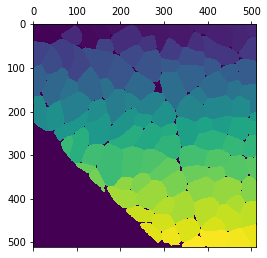

In [18]:
import matplotlib.pyplot as plt
path = "test512512.png"
mask = img_to_cellpose(path)
plt.matshow(mask)

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


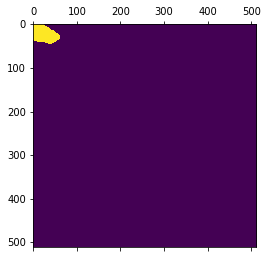

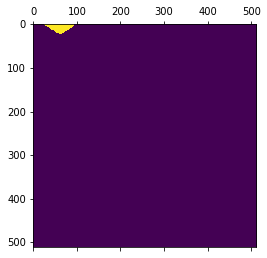

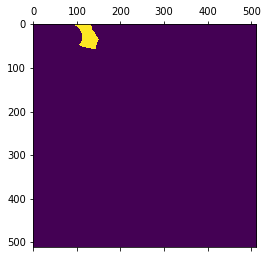

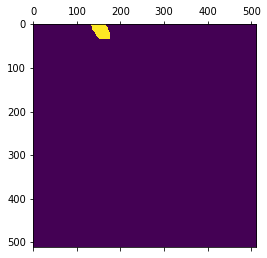

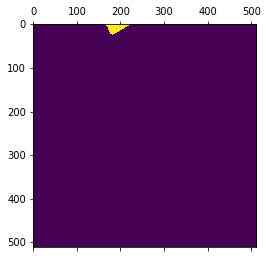

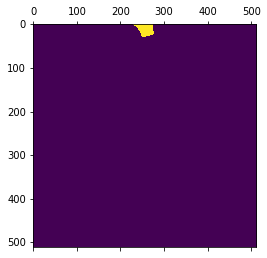

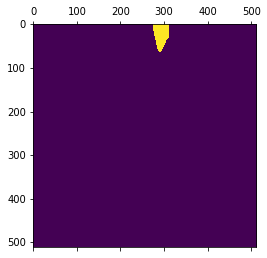

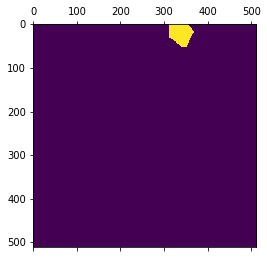

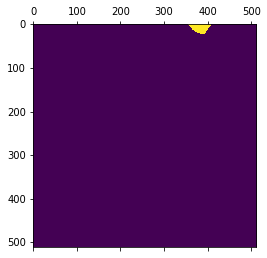

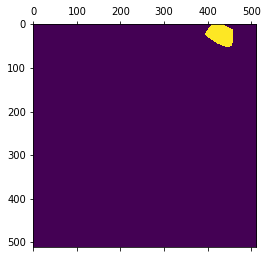

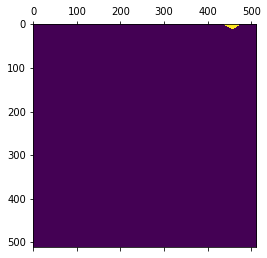

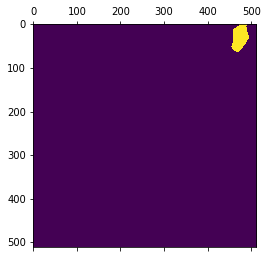

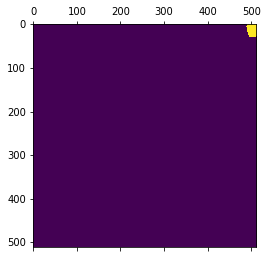

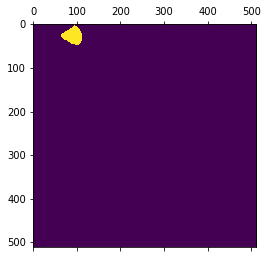

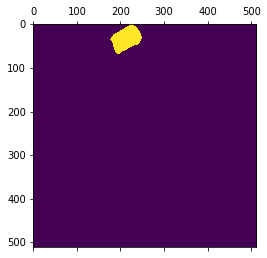

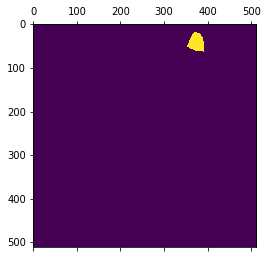

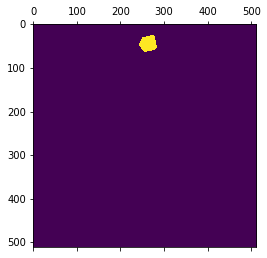

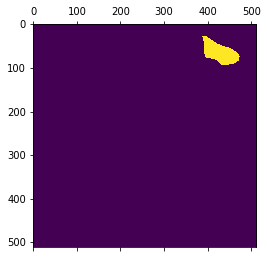

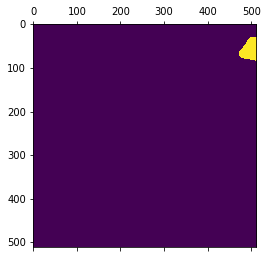

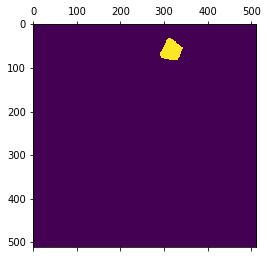

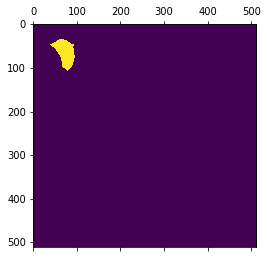

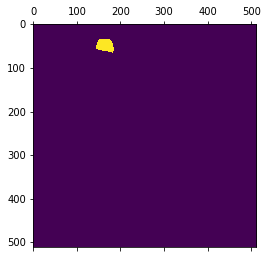

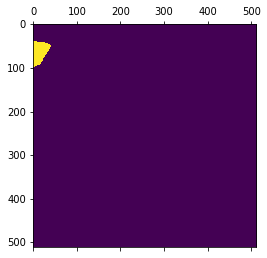

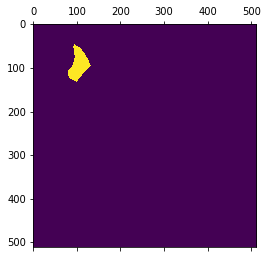

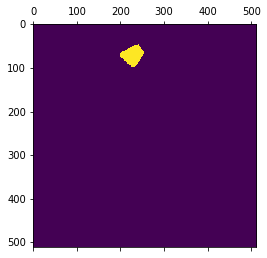

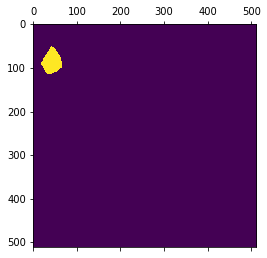

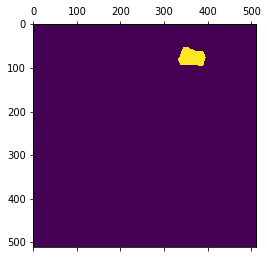

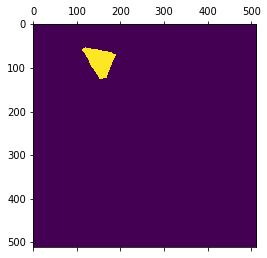

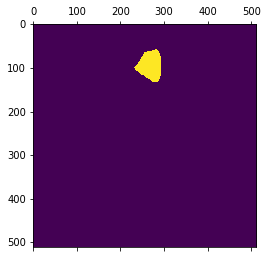

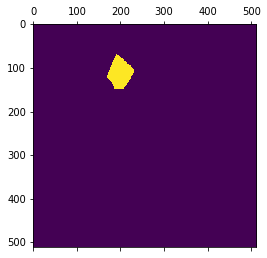

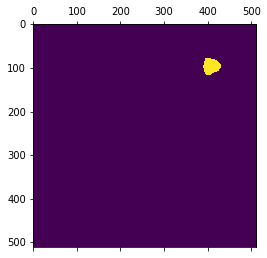

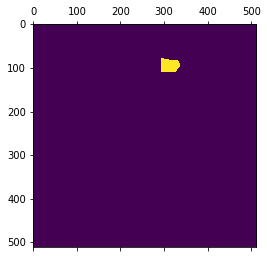

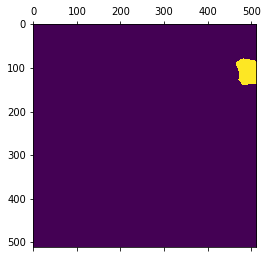

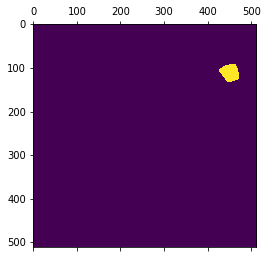

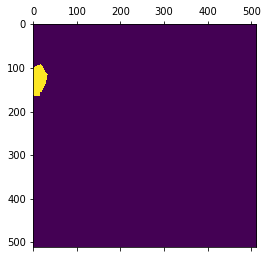

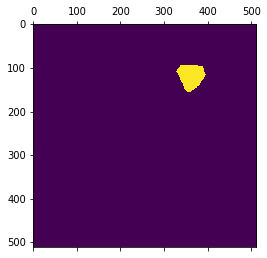

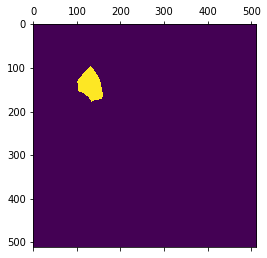

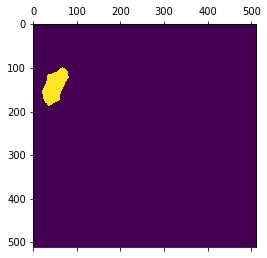

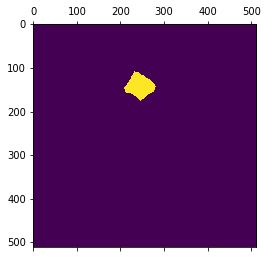

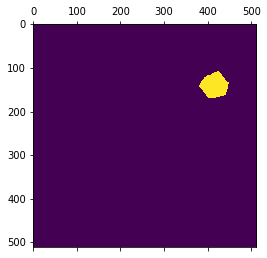

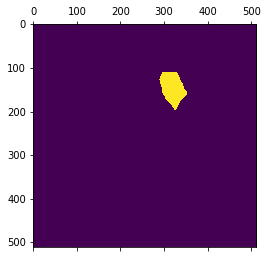

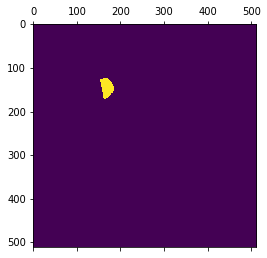

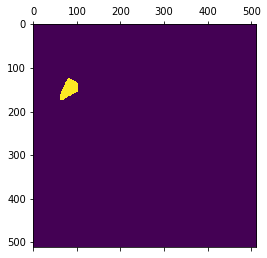

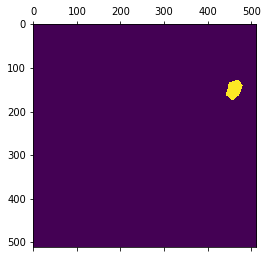

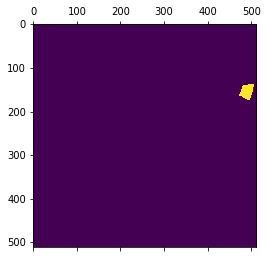

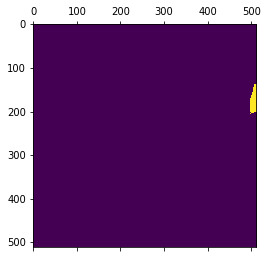

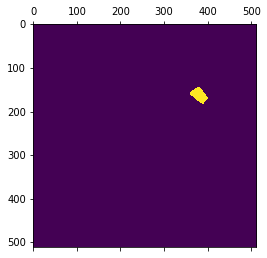

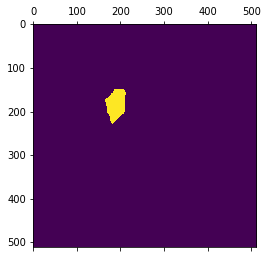

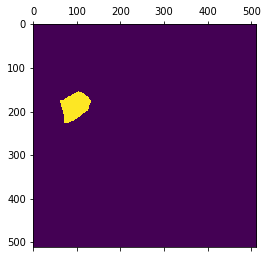

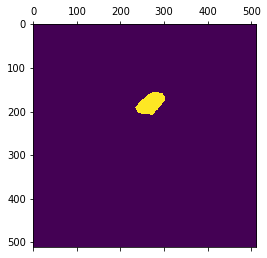

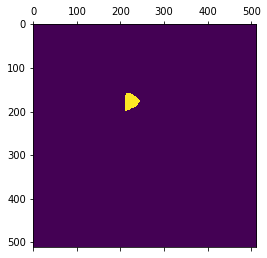

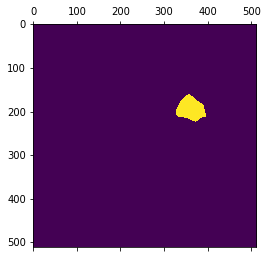

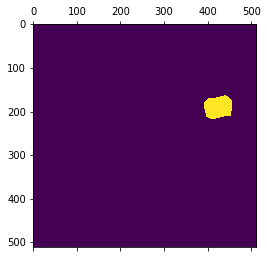

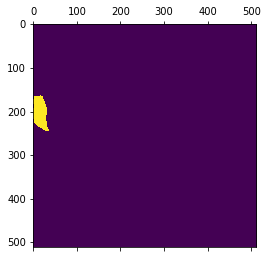

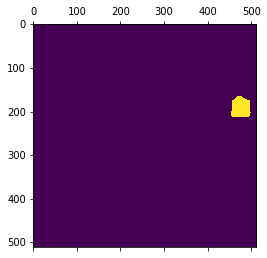

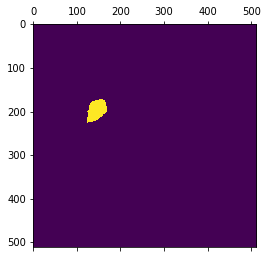

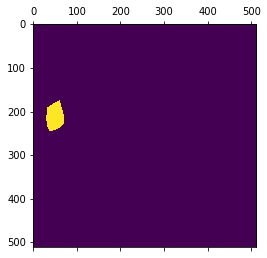

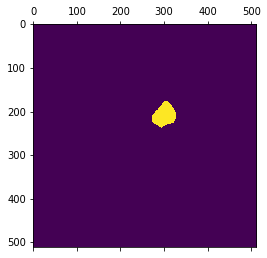

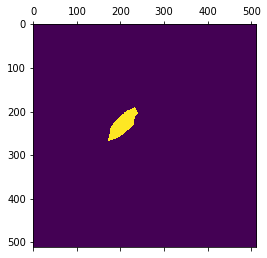

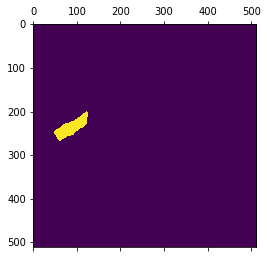

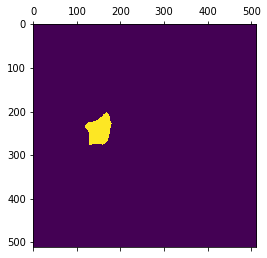

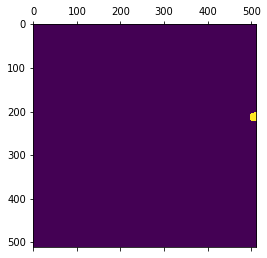

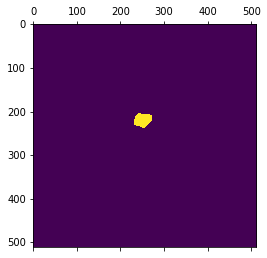

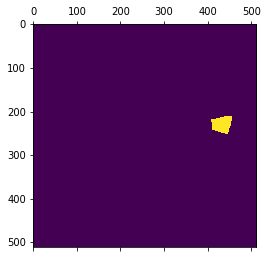

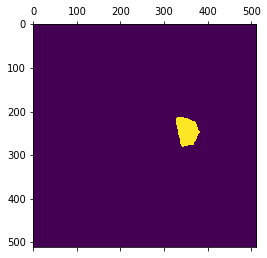

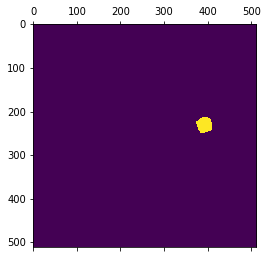

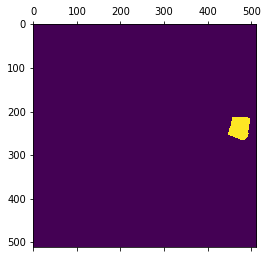

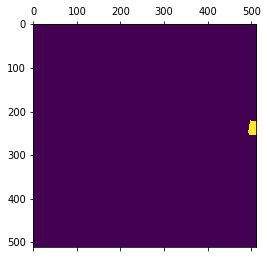

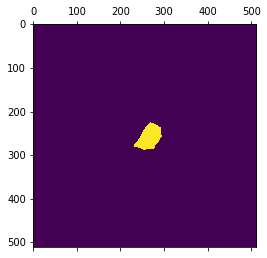

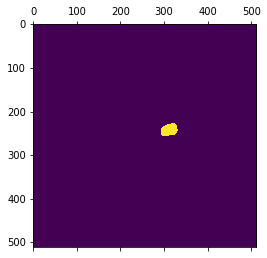

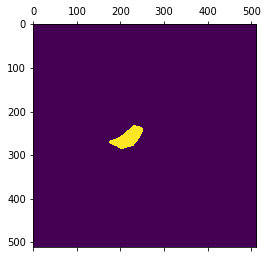

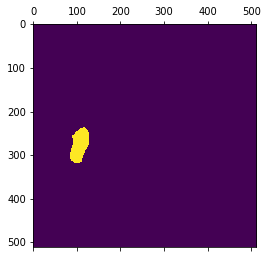

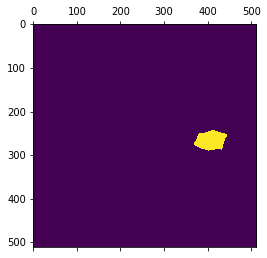

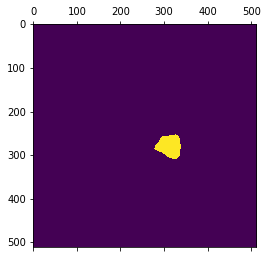

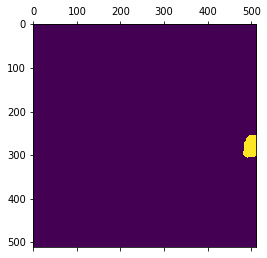

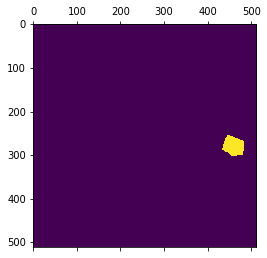

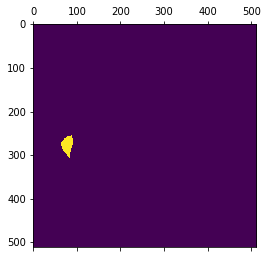

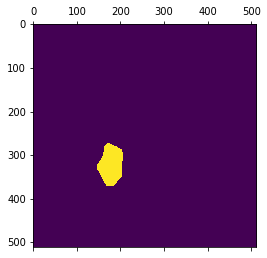

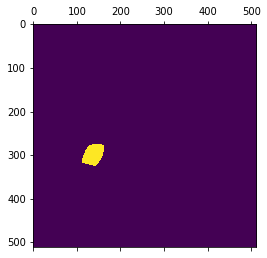

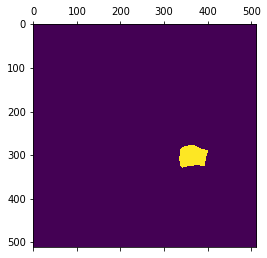

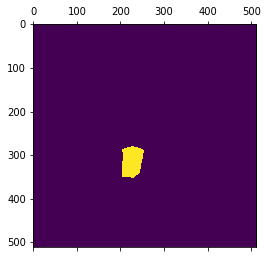

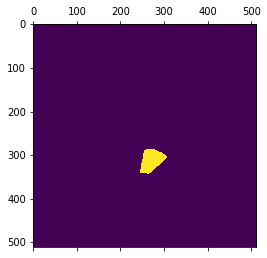

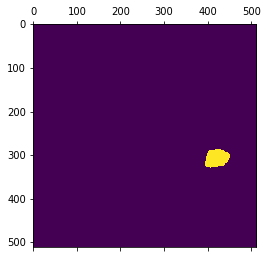

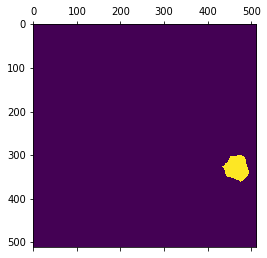

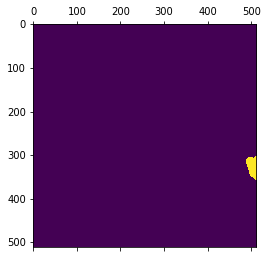

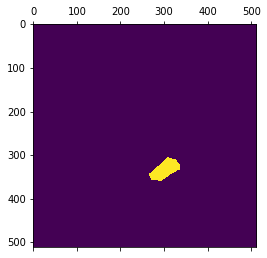

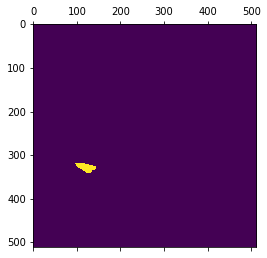

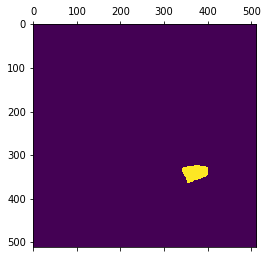

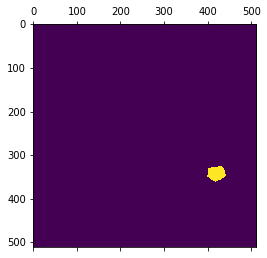

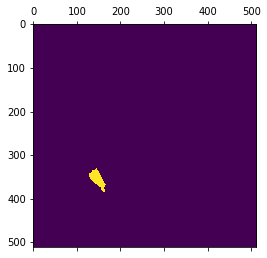

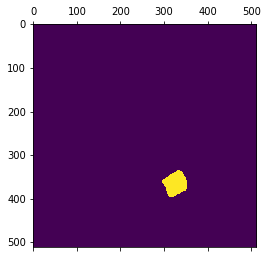

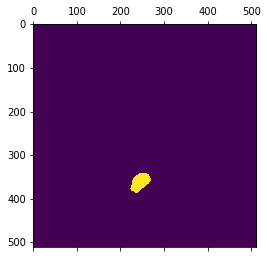

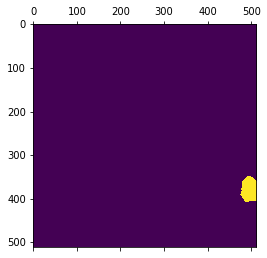

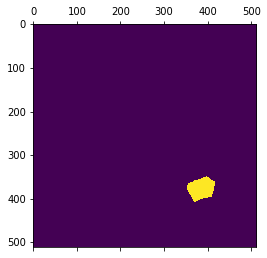

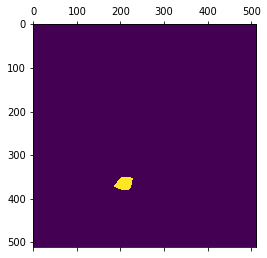

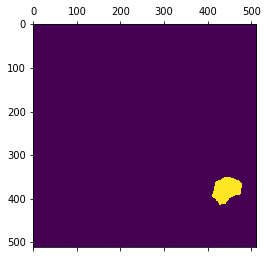

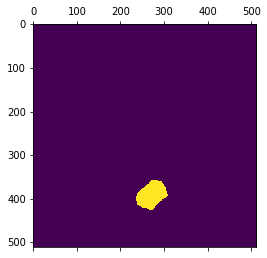

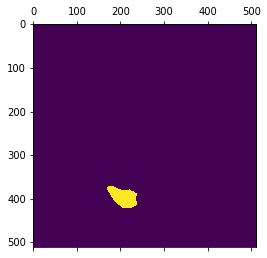

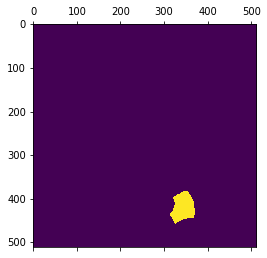

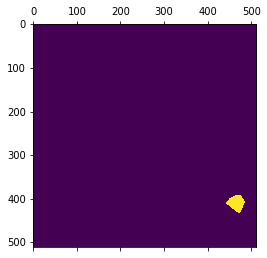

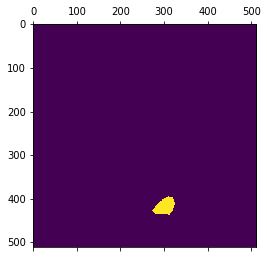

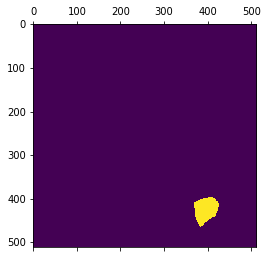

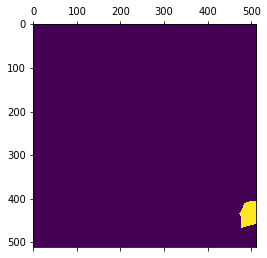

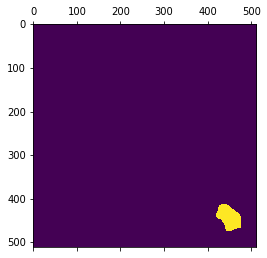

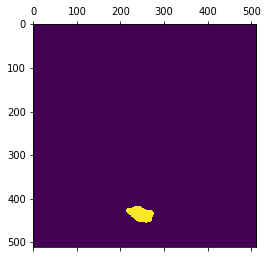

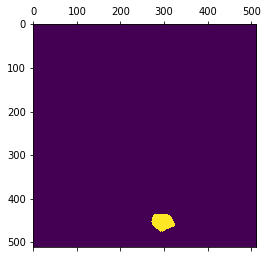

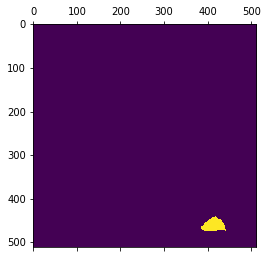

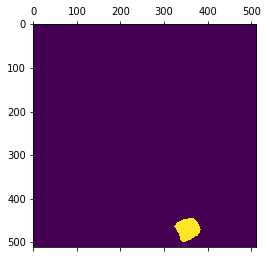

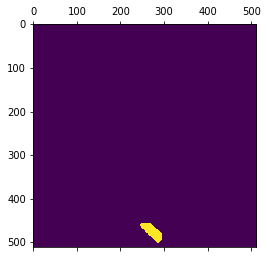

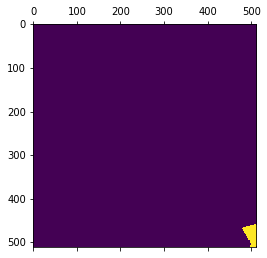

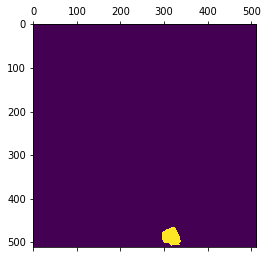

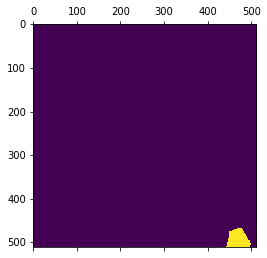

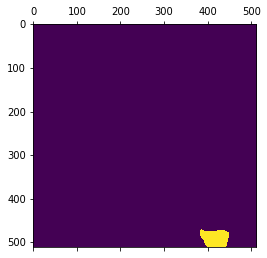

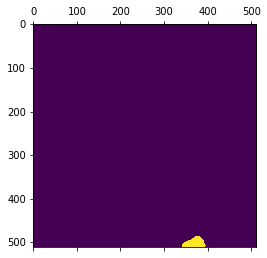

In [19]:
masks, _ = obj_detection(mask, class_id=1)
for i in range(len(masks)):
    plt.matshow(masks[i])